# Time series forecasting
Time series forecasting involves predicting future values based on historical time-ordered data. It is widely used in various fields such as finance, economics, weather forecasting, and supply chain management. The key idea is to use patterns in the past to make predictions about future data points.

## Key Concepts in Time Series Forecasting:
- Time Series: A sequence of data points collected at successive, evenly spaced points in time (e.g., daily, monthly, yearly observations).

- Stationarity: A stationary time series has a constant mean, variance, and autocovariance over time. Many forecasting models assume that the time series is stationary, so non-stationary data often need to be transformed.

### Trend and Seasonality:

- Trend: A long-term upward or downward direction in the data.
- Seasonality: Regular, repeating fluctuations over a fixed period, such as yearly or monthly cycles.
- Noise: Random fluctuations that are unpredictable and can't be modeled.

## Popular Time Series Forecasting Methods:

- ARIMA (AutoRegressive Integrated Moving Average):

ARIMA combines autoregression, differencing (to make the series stationary), and moving averages. It works well for univariate data without strong seasonal components.

- Seasonal ARIMA (SARIMA):

Extends ARIMA to capture seasonality in data. SARIMA introduces seasonal parameters to handle repeating patterns.

- Exponential Smoothing (ETS):

A method that assigns exponentially decreasing weights to past observations. The most common models include Simple Exponential Smoothing, Holt’s Linear Trend, and Holt-Winters (which handles seasonality).

- Vector Autoregression (VAR):

A multivariate model used when there are multiple time series that may influence each other. It generalizes AR models by allowing multiple dependent variables.

- Prophet:

Developed by Facebook, Prophet is an additive regression model designed to handle time series with strong seasonal effects and missing data. It is robust and relatively easy to tune.

- LSTM (Long Short-Term Memory Networks):

A deep learning technique designed for sequential data, LSTMs are effective at capturing long-term dependencies in time series data.


## Steps in Time Series Forecasting:

- Exploratory Data Analysis (EDA):

Visualizing the data to identify patterns like trends, seasonality, and outliers.
Calculate summary statistics (mean, variance, etc.) and use plots like line plots, autocorrelation (ACF), and partial autocorrelation (PACF).

- Preprocessing:

Handle missing values, outliers, and transformations like log or differencing to make the series stationary.
Split the dataset into training and test sets to evaluate model performance.

- Model Selection:

Choose an appropriate model based on the nature of the data (ARIMA for non-seasonal data, SARIMA for seasonal data, etc.).
Use techniques like AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to compare models.

- Model Training:

Fit the selected model to the training data.

- Evaluation:

Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate the performance of the model on the test set.

- Forecasting:

Make predictions for future time points based on the trained model.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [15]:
df = pd.read_csv('airline-passengers.csv',index_col=['Month'],parse_dates=True)
df.shape

(144, 1)

In [16]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [8]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

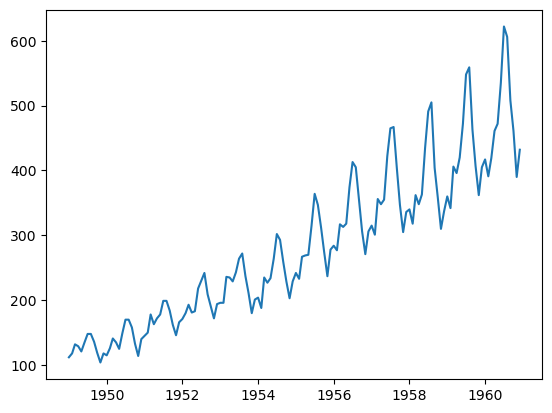

In [18]:
plt.plot(df)

In [25]:
model = seasonal_decompose(df['Passengers'],model='multiplicative')

<Axes: xlabel='Month'>

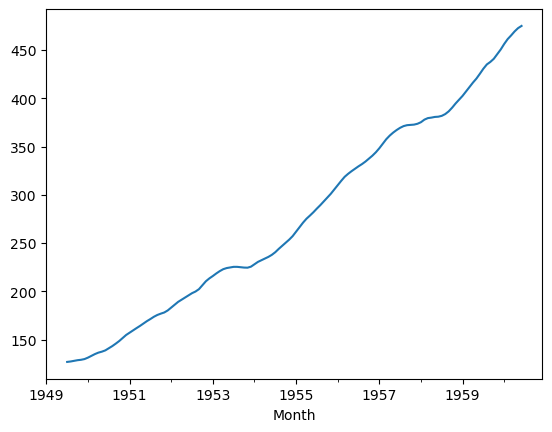

In [26]:
model.trend.plot()

<Axes: xlabel='Month'>

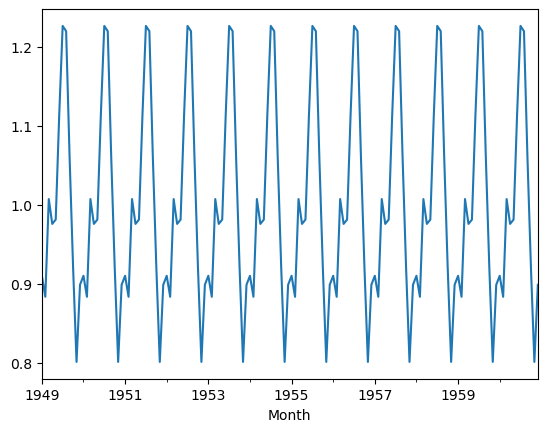

In [27]:
model.seasonal.plot()

<Axes: xlabel='Month'>

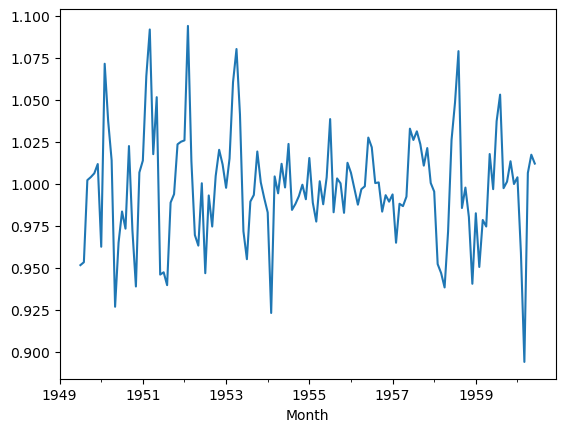

In [28]:
model.resid.plot()

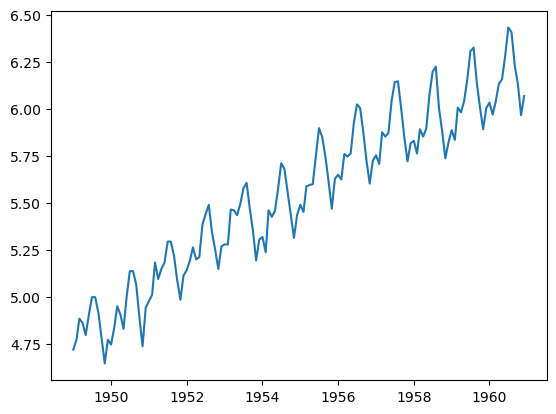

In [31]:
model1 = seasonal_decompose(np.log(df['Passengers']),model='multiplicative')
plt.plot(np.log(df['Passengers']))

## Simple_Exp_Smoothing

In [32]:
import warnings
warnings.filterwarnings('ignore')

In [35]:
simple = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=0.5)

In [36]:
simple.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    115.000000
1949-04-01    123.500000
1949-05-01    126.250000
                 ...    
1960-08-01    558.192821
1960-09-01    582.096411
1960-10-01    545.048205
1960-11-01    503.024103
1960-12-01    446.512051
Length: 144, dtype: float64

In [42]:
fore1 = simple.forecast(10)
fore1

1961-01-01    439.256026
1961-02-01    439.256026
1961-03-01    439.256026
1961-04-01    439.256026
1961-05-01    439.256026
1961-06-01    439.256026
1961-07-01    439.256026
1961-08-01    439.256026
1961-09-01    439.256026
1961-10-01    439.256026
Freq: MS, dtype: float64

In [43]:
df['SES'] = simple = SimpleExpSmoothing(df['Passengers']).fit(smoothing_level=0.5).fittedvalues
df

,Passengers,SES
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.000000
1949-03-01,132,115.000000
1949-04-01,129,123.500000
1949-05-01,121,126.250000
...,...,...
1960-08-01,606,558.192821
1960-09-01,508,582.096411
1960-10-01,461,545.048205


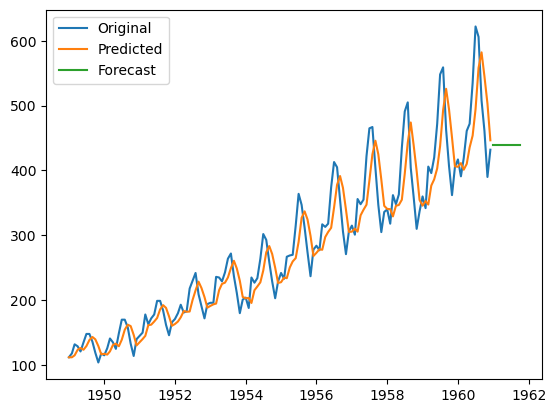

In [52]:
plt.plot(df['Passengers'],label='Original')
plt.plot(df['SES'],label='Predicted')
plt.plot(fore1,label='Forecast')
plt.legend()

## Double_Exp_Smoothing

In [46]:
double = ExponentialSmoothing(df['Passengers'],trend='multiplicative').fit(smoothing_level=0.5,
                                                                          smoothing_trend=0.6)

In [47]:
double.fittedvalues

Month
1949-01-01    114.229920
1949-02-01    118.852936
1949-03-01    124.165984
1949-04-01    136.832351
1949-05-01    139.557319
                 ...    
1960-08-01    668.882813
1960-09-01    697.957404
1960-10-01    606.316698
1960-11-01    498.029410
1960-12-01    387.405890
Length: 144, dtype: float64

In [50]:
fore2 = double.forecast(10)
fore2

1961-01-01    369.813057
1961-02-01    333.806967
1961-03-01    301.306535
1961-04-01    271.970442
1961-05-01    245.490597
1961-06-01    221.588908
1961-07-01    200.014358
1961-08-01    180.540370
1961-09-01    162.962427
1961-10-01    147.095924
Freq: MS, dtype: float64

In [53]:
df['DES'] = ExponentialSmoothing(df['Passengers'],trend='multiplicative').fit(smoothing_level=0.5,
                                                                    smoothing_trend=0.6).fittedvalues

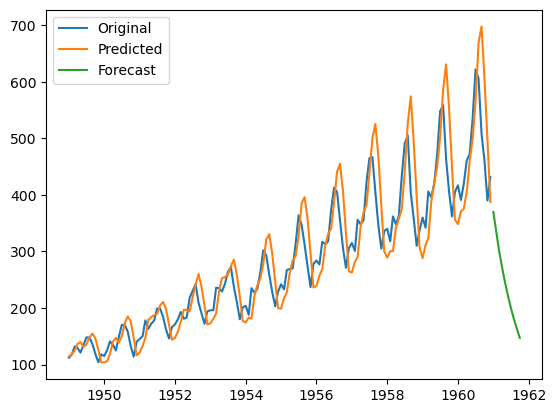

In [54]:
plt.plot(df['Passengers'],label='Original')
plt.plot(df['DES'],label='Predicted')
plt.plot(fore2,label='Forecast')
plt.legend()

## Triple_Exp_Smoothing

In [58]:
triple = ExponentialSmoothing(df['Passengers'],trend='multiplicative',seasonal='multiplicative').fit(smoothing_level=0.5,
                                                                                                     smoothing_trend=0.6,
                                                                                                     smoothing_seasonal=0.7)

In [59]:
triple.fittedvalues

Month
1949-01-01    111.899001
1949-02-01    117.589547
1949-03-01    131.368448
1949-04-01    127.904898
1949-05-01    123.945157
                 ...    
1960-08-01    634.723011
1960-09-01    501.230848
1960-10-01    437.942567
1960-11-01    404.237210
1960-12-01    437.766428
Length: 144, dtype: float64

In [61]:
fore3 = triple.forecast(10)
fore3

1961-01-01    442.655591
1961-02-01    417.243250
1961-03-01    462.558578
1961-04-01    517.013987
1961-05-01    511.840720
1961-06-01    570.879375
1961-07-01    657.250496
1961-08-01    645.485495
1961-09-01    546.480592
1961-10-01    487.681340
Freq: MS, dtype: float64

In [62]:
df['TES'] = ExponentialSmoothing(df['Passengers'],trend='multiplicative',seasonal='multiplicative').fit(smoothing_level=0.5,
                                                 smoothing_trend=0.6,smoothing_seasonal=0.7).fittedvalues

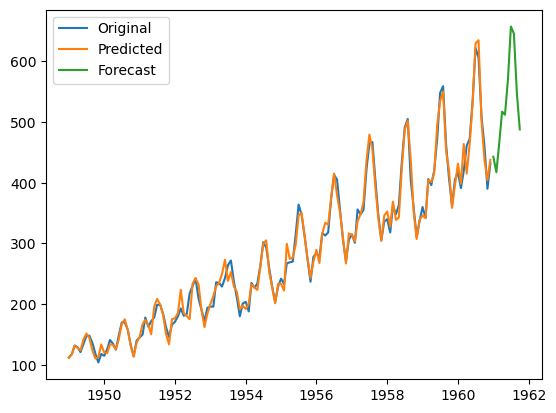

In [63]:
plt.plot(df['Passengers'],label='Original')
plt.plot(df['TES'],label='Predicted')
plt.plot(fore3,label='Forecast')
plt.legend()

In [68]:
simple_mae = mean_absolute_error(df['Passengers'],df['SES'])
simple_mae

30.849513588313584

In [73]:
# mae = Mean_absolute_error
simple_mae = round(mean_absolute_error(df['Passengers'], df['SES']), 2)
double_mae = round(mean_absolute_error(df['Passengers'], df['DES']), 2)
triple_mae = round(mean_absolute_error(df['Passengers'], df['TES']), 2)
print(simple_mae,'\n',double_mae,'\n',triple_mae)

30.85 
 38.03 
 9.32


In [74]:
# mse = Mean_square_error
simple_mse = round(mean_squared_error(df['Passengers'],df['SES']),2)
double_mse = round(mean_squared_error(df['Passengers'],df['DES']),2)
triple_mse = round(mean_squared_error(df['Passengers'],df['TES']),2)
print(simple_mse,'\n',double_mse,'\n',triple_mse)

1729.83 
 2750.03 
 168.68


In [79]:
# Mape = Mean_absolute_percentage_error
simple_mape = round(mean_absolute_percentage_error(df['Passengers'],df['SES'])*100,2)
double_mape = round(mean_absolute_percentage_error(df['Passengers'],df['DES'])*100,2)
triple_mape = round(mean_absolute_percentage_error(df['Passengers'],df['TES'])*100,2)
print(simple_mape,'\n',double_mape,'\n',triple_mape)

10.47 
 13.4 
 3.59


In [81]:
# rmse = mean_square_error
simple_rmse = round(np.sqrt(mean_squared_error(df['Passengers'],df['SES'])),2)
simple_rmse

41.59

In [86]:
data = pd.DataFrame({'Methods':['SES','DES','TES'],'MAE':[simple_mae,double_mae,triple_mae],
    'MSE':[simple_mse,double_mse,triple_mse],'MAPE':[simple_mape,double_mape,triple_mape]})

In [87]:
data

,Methods,MAE,MSE,MAPE
0,SES,30.85,1729.83,10.47
1,DES,38.03,2750.03,13.40
2,TES,9.32,168.68,3.59


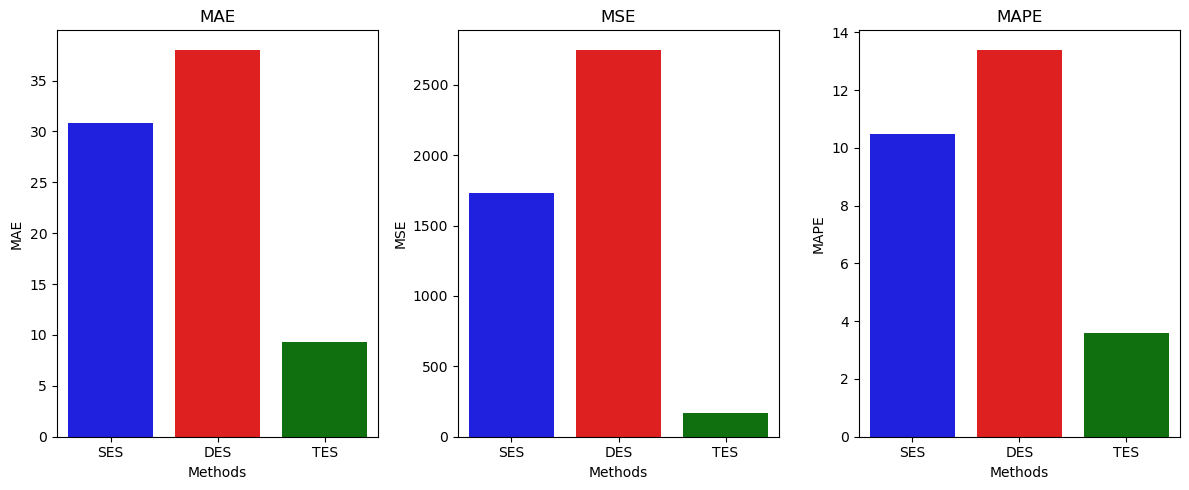

In [97]:
colors = ['Blue', 'Red', 'Green']    # '#3498db', '#e74c3c', '#2ecc71'
fig,axs = plt.subplots(1,3,figsize=(12,5))
sns.barplot(ax=axs[0],x=data.Methods,y=data.MAE,palette=colors)
axs[0].set_title('MAE')
sns.barplot(ax=axs[1],x=data.Methods,y=data.MSE,palette=colors)
axs[1].set_title('MSE')
sns.barplot(ax=axs[2],x=data.Methods,y=data.MAPE,palette=colors)
axs[2].set_title('MAPE')
plt.tight_layout()